# COVID-19 vs World-Happiness Data Analysis Notebook
------------------------------------------

### Importing Libraries

In [7]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
print('Modules are imported.')

Modules are imported.


### Importing the Dataset

In [8]:
corona_dataset_csv = pd.read_csv("data/covid19_Confirmed_dataset.csv")
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


#### Check the shape of the dataframe

In [3]:
corona_dataset_csv.shape

(266, 104)

### Delete the useless columns

In [4]:
corona_dataset_csv.drop(["Lat","Long"],axis=1,inplace=True)
corona_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Aggregate rows by Country

In [5]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [6]:
corona_dataset_aggregated.shape

(187, 100)

### Find maxmimum infection rate for China

In [7]:
corona_dataset_aggregated.loc['China'].diff().max()

15136.0

### Find maximum infection rate for all of the countries. 

In [8]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries : 
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["max_infection_rate"] = max_infection_rates

In [9]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


### Create a new dataframe with only needed column 

In [10]:
corona_data=pd.DataFrame (corona_dataset_aggregated["max_infection_rate"])

In [11]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


### Importing the WorldHappinessReport dataset

In [12]:
happiness_report_csv = pd.read_csv ("data/worldwide_happiness_report.csv")

In [13]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Drop the useless columns 

In [14]:
useless_cols= ["Overall rank"]

In [15]:
happiness_report_csv.drop(useless_cols,axis=1, inplace=True)
happiness_report_csv.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Changing the indices of the dataframe

In [16]:
happiness_report_csv.set_index("Country or region",inplace = True)

In [17]:
happiness_report_csv.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,
Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Join Corona and World Happiness Datasets

#### Corona Dataset :

In [18]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [19]:
corona_data.shape

(187, 1)

#### World happiness report Dataset :

In [20]:
happiness_report_csv.shape

(156, 7)

In [21]:
data = corona_data.join(happiness_report_csv,how="inner")
data.head()

,max_infection_rate,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Afghanistan,232.0,3.203,0.350,0.517,0.361,0.000,0.158,0.025
Albania,34.0,4.719,0.947,0.848,0.874,0.383,0.178,0.027
Algeria,199.0,5.211,1.002,1.160,0.785,0.086,0.073,0.114
Argentina,291.0,6.086,1.092,1.432,0.881,0.471,0.066,0.050
Armenia,134.0,4.559,0.850,1.055,0.815,0.283,0.095,0.064


### Generate Correlation matrix 

In [22]:
data.corr()

,max_infection_rate,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
max_infection_rate,1.000000,0.228783,0.250118,0.191958,0.289263,0.078196,-0.114635,0.097703
Score,0.228783,1.000000,0.793847,0.788591,0.799893,0.587007,0.090420,0.420437
GDP per capita,0.250118,0.793847,1.000000,0.759468,0.863062,0.394603,-0.103870,0.311577
Social support,0.191958,0.788591,0.759468,1.000000,0.765286,0.456246,-0.061361,0.203225
Healthy life expectancy,0.289263,0.799893,0.863062,0.765286,1.000000,0.427892,-0.068387,0.314811
Freedom to make life choices,0.078196,0.587007,0.394603,0.456246,0.427892,1.000000,0.258539,0.446677
Generosity,-0.114635,0.090420,-0.103870,-0.061361,-0.068387,0.258539,1.000000,0.326166
Perceptions of corruption,0.097703,0.420437,0.311577,0.203225,0.314811,0.446677,0.326166,1.000000


### Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [23]:
data.head()

,max_infection_rate,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Afghanistan,232.0,3.203,0.350,0.517,0.361,0.000,0.158,0.025
Albania,34.0,4.719,0.947,0.848,0.874,0.383,0.178,0.027
Algeria,199.0,5.211,1.002,1.160,0.785,0.086,0.073,0.114
Argentina,291.0,6.086,1.092,1.432,0.881,0.471,0.066,0.050
Armenia,134.0,4.559,0.850,1.055,0.815,0.283,0.095,0.064


### Plotting GDP per capita vs maximum infection rate

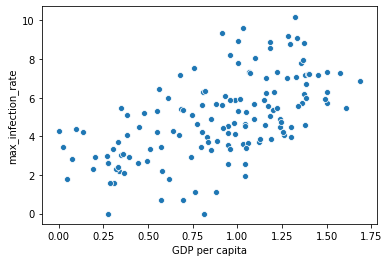

In [24]:
x = data ["GDP per capita"]
y = data ["max_infection_rate"]
sns.scatterplot (x,np.log(y))

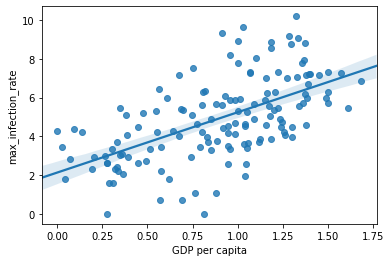

In [25]:
sns.regplot(x, np.log(y))
# Saving the Seaborn Figure:
plt.savefig('img/GDPConfirmed.png')

### Plotting Social support vs maximum infection rate

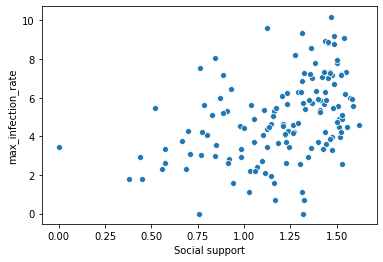

In [26]:
x = data ["Social support"]
y = data ["max_infection_rate"]
sns.scatterplot (x,np.log(y))

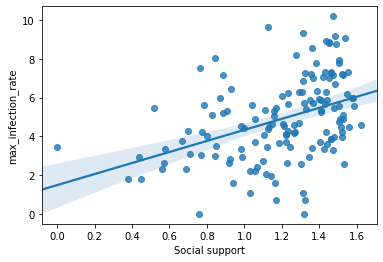

In [27]:
sns.regplot(x, np.log(y))
# Saving the Seaborn Figure:
plt.savefig('img/SocialConfirmed.png')

### Plotting Healthy life expectancy vs maximum infection rate

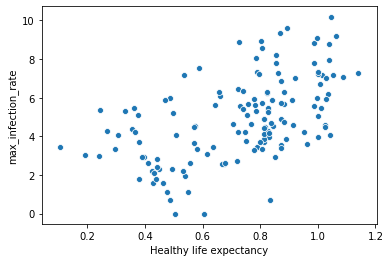

In [28]:
x = data ["Healthy life expectancy"]
y = data ["max_infection_rate"]
sns.scatterplot (x,np.log(y))

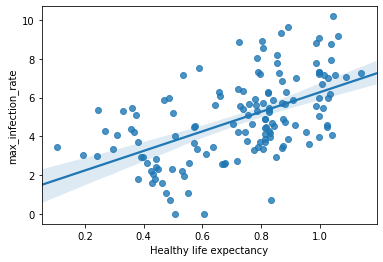

In [29]:
sns.regplot(x, np.log(y))
# Saving the Seaborn Figure:
plt.savefig('img/LifeConfirmed.png')

### Plotting Freedom to make life choices vs maximum infection rate

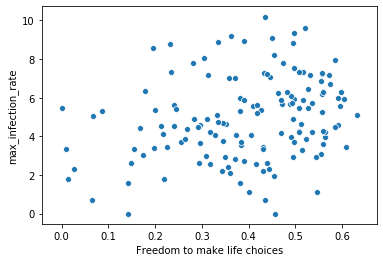

In [30]:
x = data ["Freedom to make life choices"]
y = data ["max_infection_rate"]
sns.scatterplot (x,np.log(y))

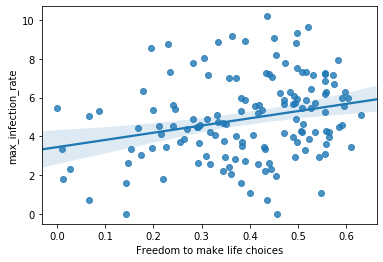

In [31]:
fig = sns.regplot(x, np.log(y))
# Saving the Seaborn Figure:
plt.savefig('img/FreedomConfirmed.png')

### Plotting Generosity vs maximum infection rate

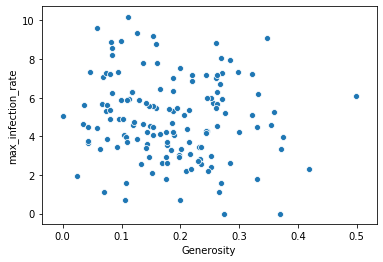

In [32]:
x = data ["Generosity"]
y = data ["max_infection_rate"]
sns.scatterplot (x,np.log(y))

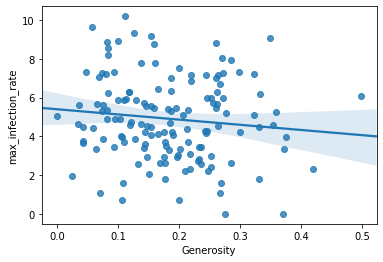

In [33]:
sns.regplot(x, np.log(y))
# Saving the Seaborn Figure:
plt.savefig('img/GenerosityConfirmed.png')

### Plotting Perceptions of corruption vs maximum infection rate

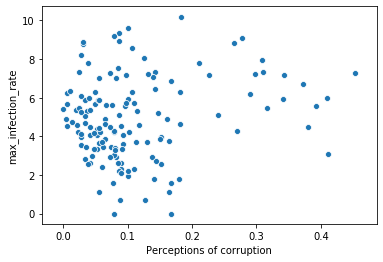

In [34]:
x = data ["Perceptions of corruption"]
y = data ["max_infection_rate"]
sns.scatterplot (x,np.log(y))

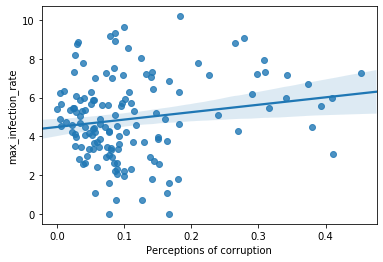

In [35]:
sns.regplot(x, np.log(y))
# Saving the Seaborn Figure:
plt.savefig('img/CorruptionConfirmed.png')

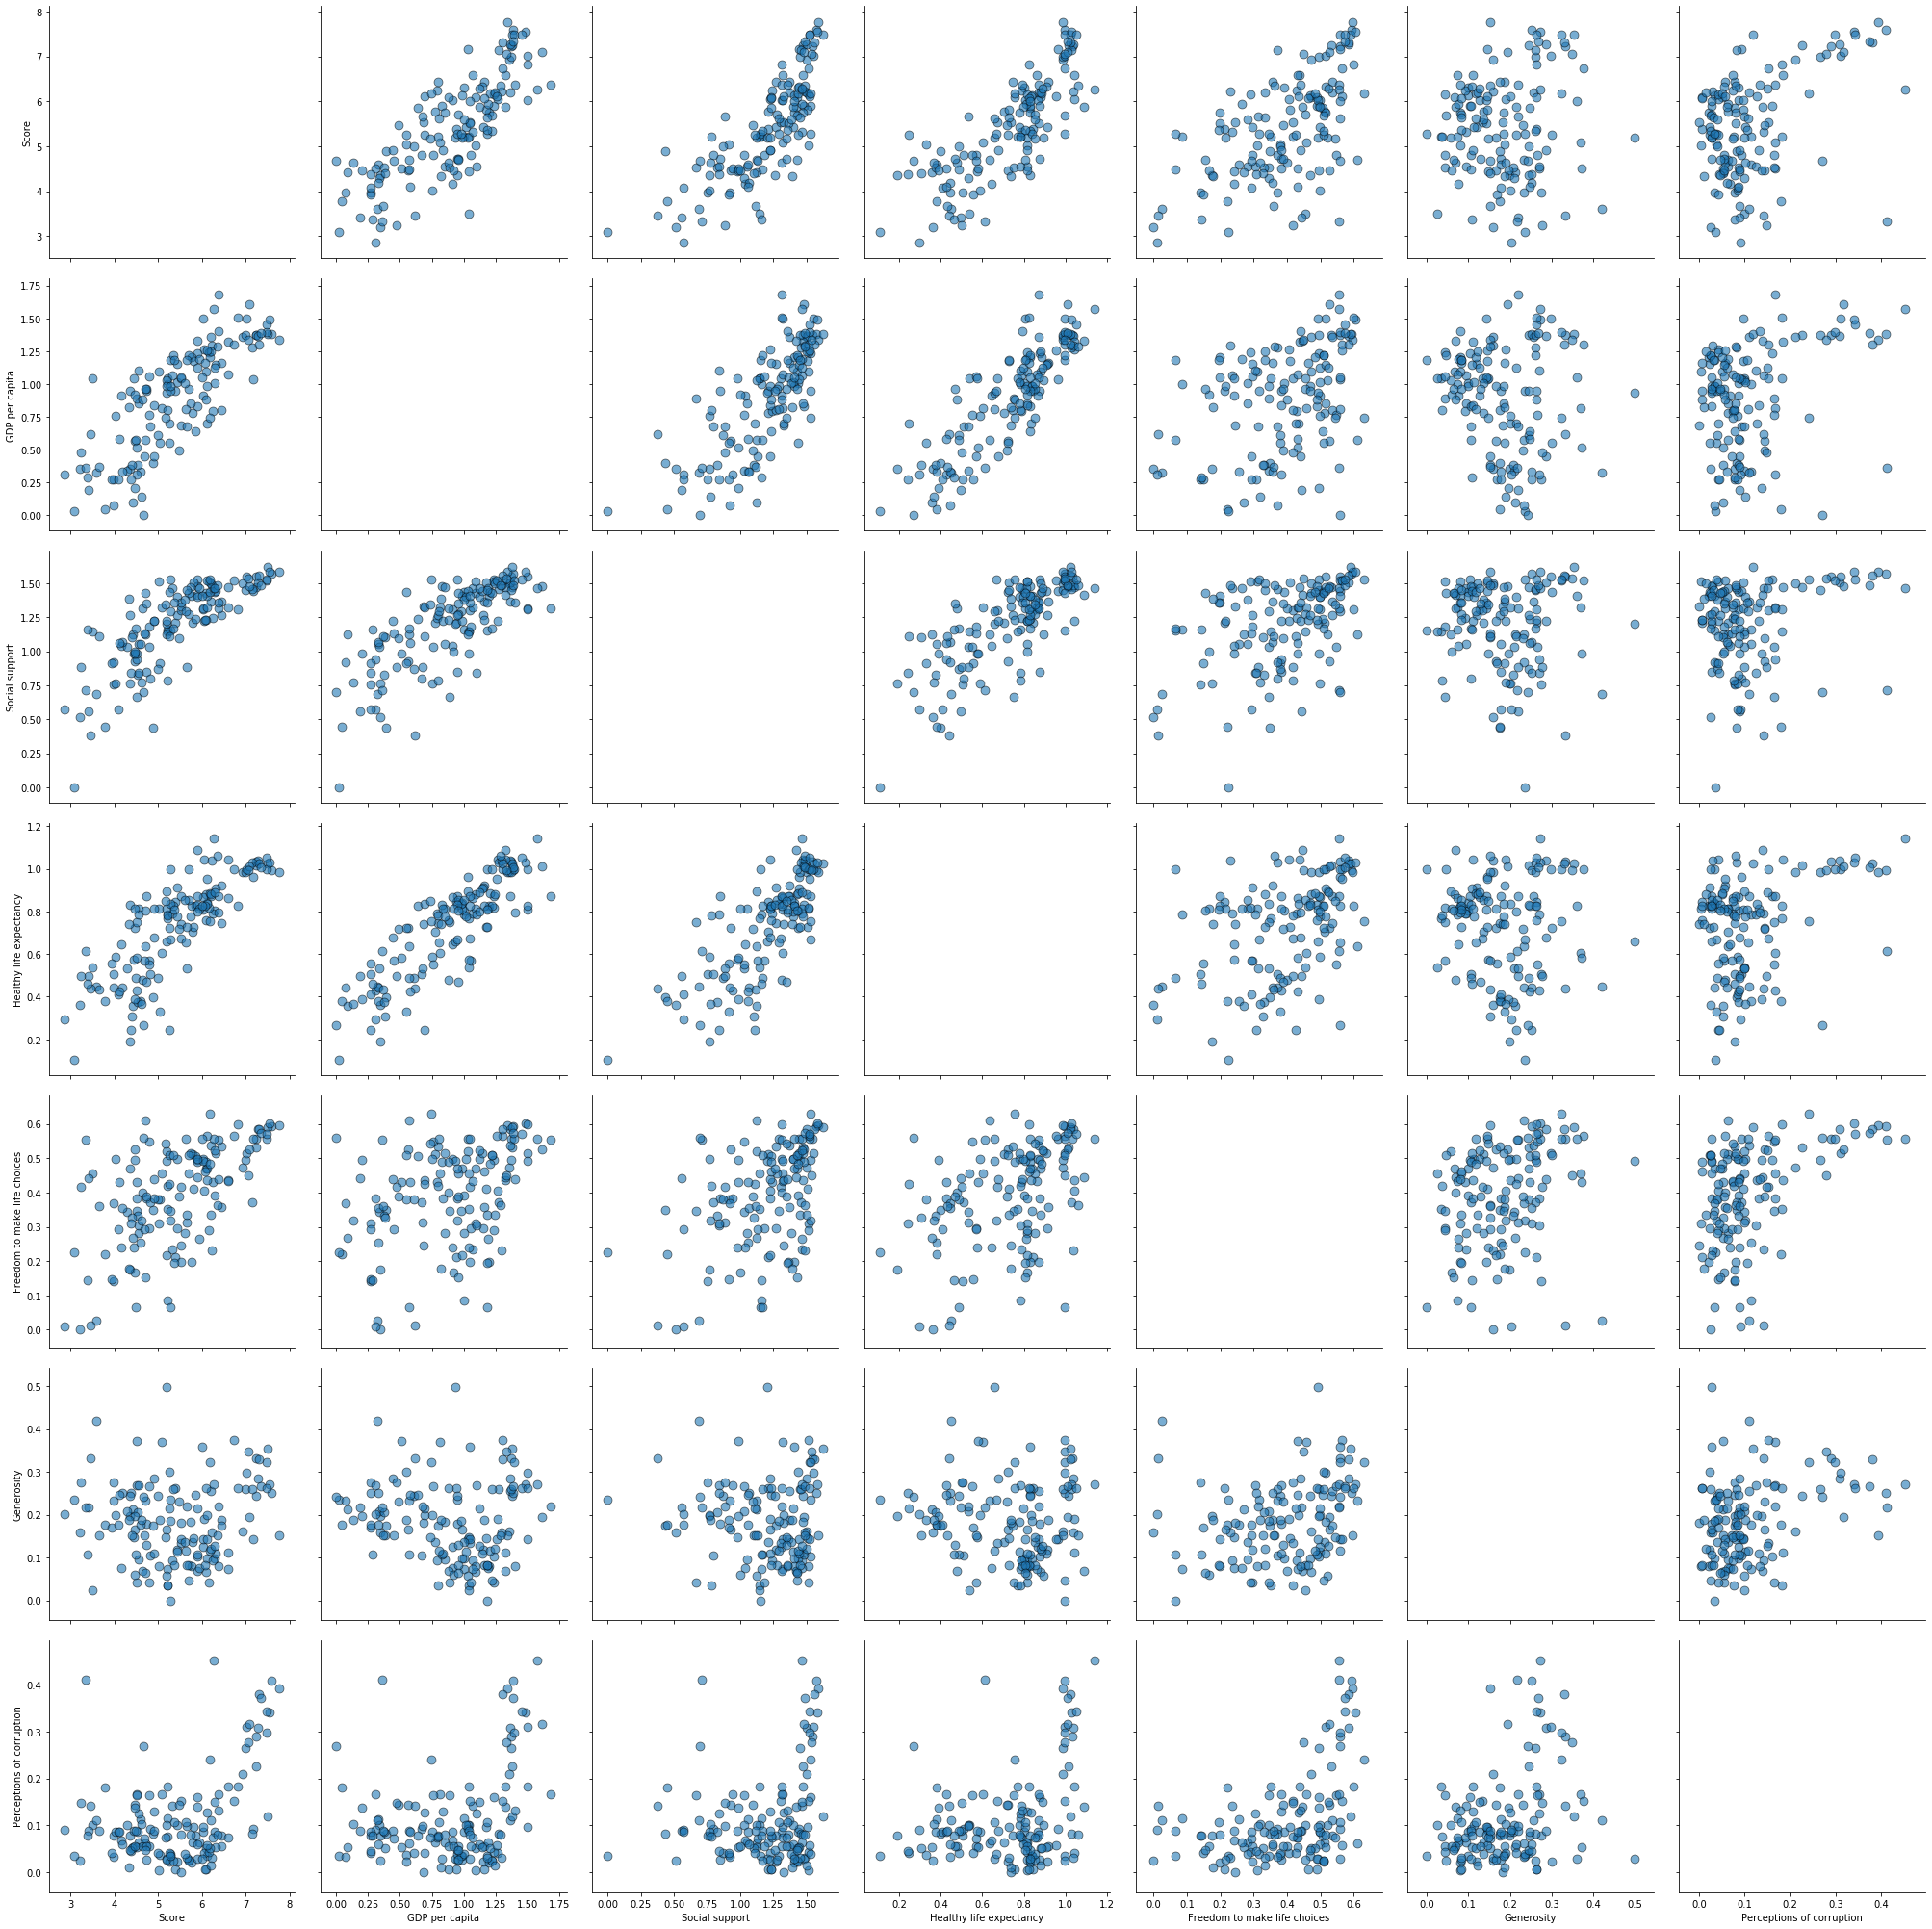

In [48]:
sns.pairplot(data[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']], diag_kind = 'reg', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},height = 4);
# Saving the Seaborn Figure:
plt.savefig('img/pairplotnConfirmed.png')